## 一、標準化
當存在多個特徵時，如果特徵範圍不宜制可能會導致梯度下降的路徑搖擺不定，效率因此變差   
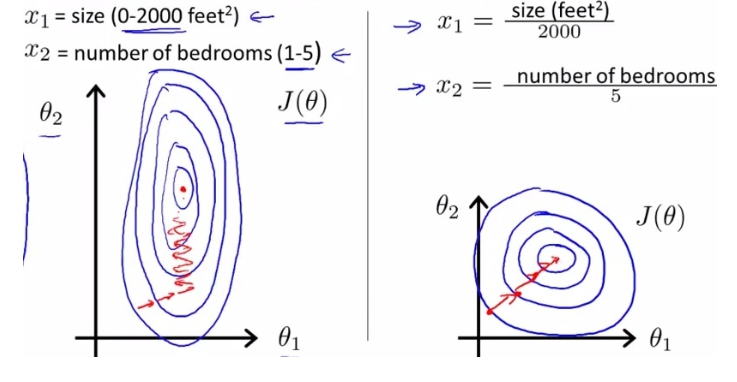

如果一個特徵對應的數據的方差很大，那麼它可能支配目標函數，使得模型無法向預期那樣學習其它特徵。  
標準化後甚至可以提高精確度，ex:Kmean分類是取決於特徵值得間距  
因此如果機器學習是依靠梯度下降法求最佳解時，標準化就非常重要，否則很難收斂  

### StandardScaler

In [1]:
#(1).(X-X_mean)/std計算每個屬性(每列)，經過處理的數據符合標準正態分布，進而使所有數據聚集在0附近，方差為1 .
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [2]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


In [3]:
#(2)可保存訓練集中的均值、方差參數，然後直接用於轉換測試集數據。
scaler = preprocessing.StandardScaler().fit(X)
scaler.transform(X)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [4]:
print(scaler.mean_)
print(scaler.var_)

[1.         0.         0.33333333]
[0.66666667 0.66666667 1.55555556]


## 線性歸一化  
將屬性縮放到一個指定的最大值和最小值(通常0-1之間)，這樣處理可對方差非常小的屬性增強其穩定性  
※這種方法有個缺陷就是當有新數據加入時，可能導致max和min的變化，需要重新定義  

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis= 0))  
X_scaled = X_std * (max - min) + min  
如果想要將數據映射到[-1,1]，則將公式換成：  
X_std = (X-X.mean(axis=0)) / (X.max(axis=0) - X.min(axis= 0))  

In [5]:
def Normalization(x):
    for i in x.T:
        for j in i:
            print ((float(j) -min(i))/float(max(i)-min(i)))
Normalization(X)

0.5
1.0
0.0
0.0
0.5
1.0
1.0
0.3333333333333333
0.0


In [6]:
minmaxscaler = preprocessing.MinMaxScaler().fit(X)
minmaxscaler.transform(X)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [7]:
minmaxscaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [8]:
 minmaxscaler.min_ 

array([0.        , 0.5       , 0.33333333])

### 正則化Normalizater  
正則化的過程是將每個樣本縮放到單位範數(每個樣本的範數為1)，如果要使用如二次型(點積)或者其它核方法計算兩個樣本之間的相似性這個方法會很有用。  
Normalization 主要是對每個樣本計算其p-範數，在對每個樣本除以該範數，這樣使的每個處理後樣本的p-範數(l1-norm,l2-norm)等於1  
p-範數的計算公式：||X||p=(|x1|^p+|x2|^p+...+|xn|^p)^1/p

In [9]:
normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X) #默認為l2-norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [10]:
a = np.array([[10,4,5,2], [1,4,5,7]])
normalizer = preprocessing.Normalizer(norm='l1').fit_transform(a)
#10/(10+4+5+2) = 0.476, 所以每一行的和为1。
print('l1:',normalizer)
normalizer = preprocessing.Normalizer(norm='l2').fit_transform(a)
#10/np.sqrt(100+16+25+4)＝0.830
print('l2:',normalizer)


l1: [[0.47619048 0.19047619 0.23809524 0.0952381 ]
 [0.05882353 0.23529412 0.29411765 0.41176471]]
l2: [[0.8304548  0.33218192 0.4152274  0.16609096]
 [0.10482848 0.41931393 0.52414242 0.73379939]]


In [11]:
a = np.array([[1],[2],[3]])
normalizer = preprocessing.Normalizer(norm='l1').fit_transform(a)
normalizer

array([[1.],
       [1.],
       [1.]])

### 驗證是否真的有幫助到機器學習

In [12]:
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,
                          random_state=3,scale=100,n_clusters_per_class=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\E809_Lab\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.48333333333333334

C:\Users\E809_Lab\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9833333333333333


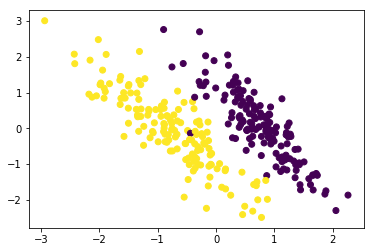

In [14]:
X = preprocessing.scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test)) 
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## Conclude : 何時該用什麼?
我先舉一個例子:一個{1,2,3,4,5}的data set  
使用StandardScaler->{−1.41,−0.71,0.,0.71,1.41}   
使用Normalizer->{1.,1.,1.,1.,1.}  
可知Normalizer不適用當特徵有不同units，像是身高、體重、年齡等，比較適用於控制好的向量大小的iterative過程，像是在訓練過成能避免有過大值(outlier)的影響  
StandardScaler 用在分類比回歸好  
Normalizer 用在回歸比分類好  

kaggle實戰:https://www.kaggle.com/iavinas/simple-short-solution-don-t-overfit-0-848

參考資料:  
https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer/45932#45932  
https://blog.csdn.net/zjm750617105/article/details/77872062
https://blog.csdn.net/m0_37870649/article/details/79535339
https://kknews.cc/code/2vg88xg.html
https://ithelp.ithome.com.tw/articles/10197357
https://moluchase.github.io/2017/11/25/sklearn02/